# Linear Regression Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
%matplotlib inline

In [2]:
data=pd.read_csv("Ecommerce Customers.csv")

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
df=data.drop(["Email","Address","Avatar"],axis=1)

In [8]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [10]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


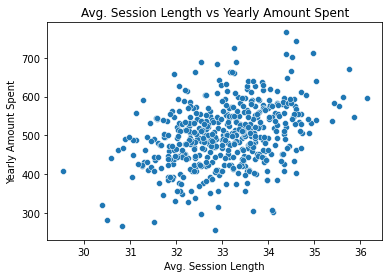

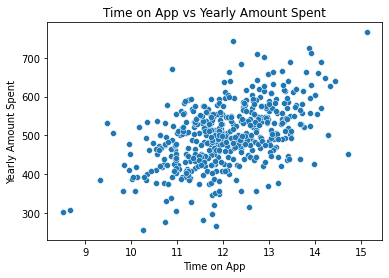

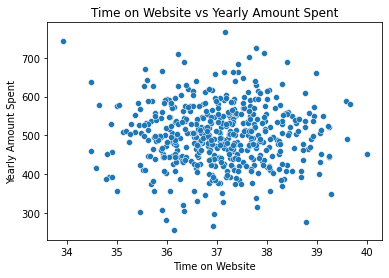

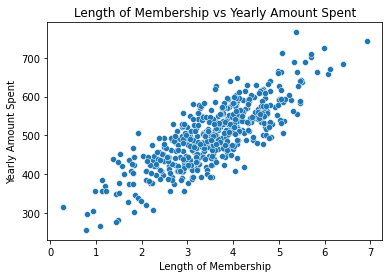

In [11]:
x_column_names=['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
for i in x_column_names:
  fig=sns.scatterplot(x=i,y="Yearly Amount Spent",data=df)
  fig.set_title(f"{i} vs Yearly Amount Spent")
  plt.show()


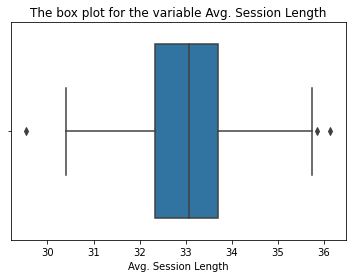

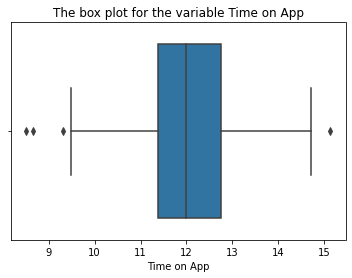

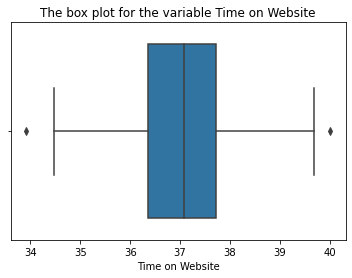

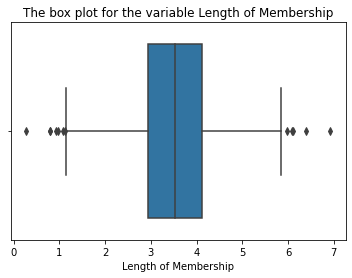

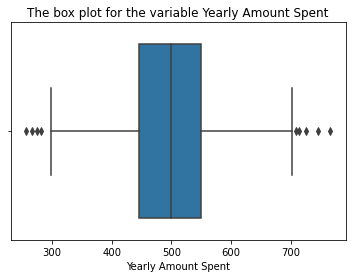

In [12]:
for i in df.columns:
  fig=sns.boxplot(x=df[i])
  fig.set_title(f"The box plot for the variable {i}")
  print("\n")
  plt.show()

In [13]:
# outlier detection
def outlier_detection(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset_outliers=dataset[(dataset[i]<lower_limit) | (dataset[i]>upper_limit)][i].values
  print(f" the outliers in the {i} variable is {dataset_outliers}")

In [14]:
for i in df.columns:
  outlier_detection(df,i)

 the outliers in the Avg. Session Length variable is [29.53242897 36.13966249 35.86023651]
 the outliers in the Time on App variable is [15.12699429  8.50815218  9.3162892   8.66834952]
 the outliers in the Time on Website variable is [40.00518164 33.91384725]
 the outliers in the Length of Membership variable is [5.97676813 6.40122884 6.07665364 6.92268934 0.96862212 0.80151572
 0.78951991 1.0845853  1.13047696 6.11519895 0.9364976  0.26990109]
 the outliers in the Yearly Amount Spent variable is [725.58481406 765.51846194 744.2218671  712.39632681 256.67058229
 282.47124572 266.08634095 708.93518487 275.91842065]


In [15]:
#outlier removal
def outlier_removal(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset=dataset[(dataset[i]>lower_limit) & (dataset[i]<upper_limit)]
  return dataset

In [16]:
for i in df.columns:
  df=outlier_removal(df,i)

In [17]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


<AxesSubplot:>

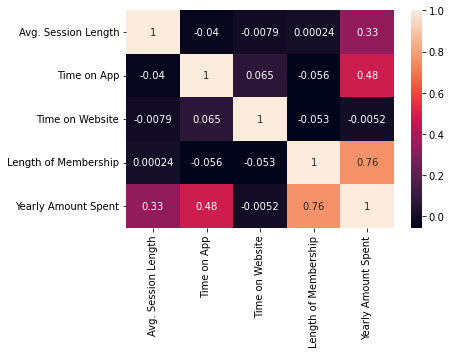

In [18]:
sns.heatmap(df.corr(),annot=True)

From the heatmap we can notice that their is a less negative or nearly zero correlation between the Time on Website and the Yearly amount Spent.
Their is a high positive correlation between the length of Membership and the yearly amount spent.

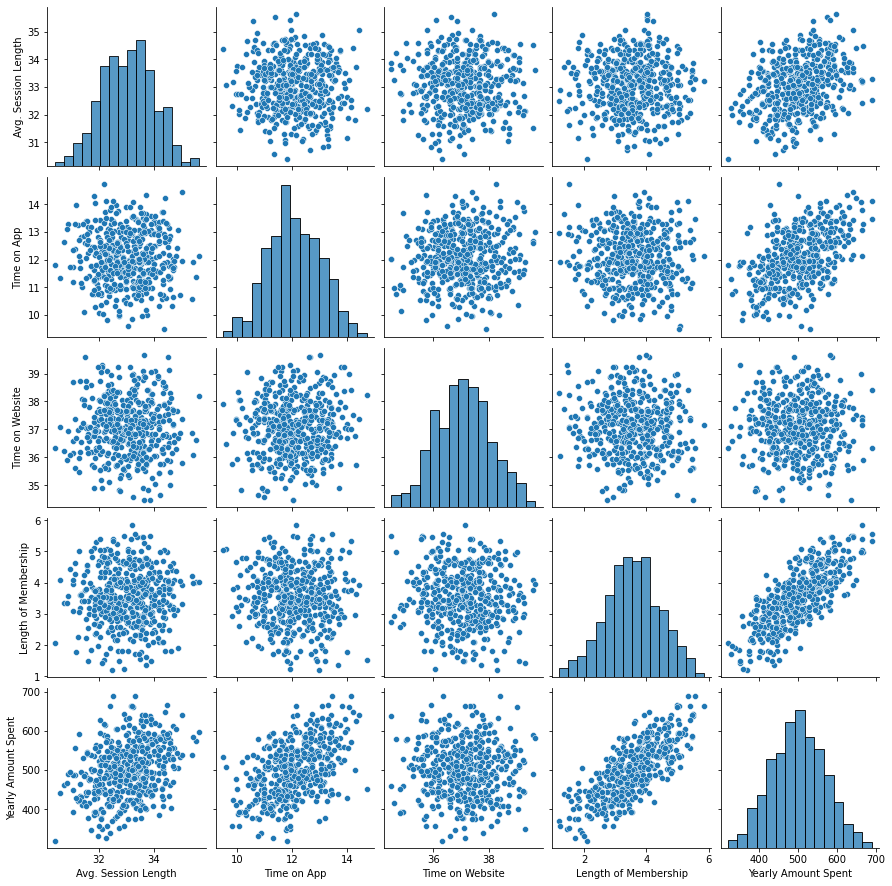

In [19]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


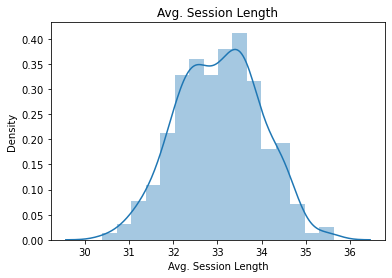

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


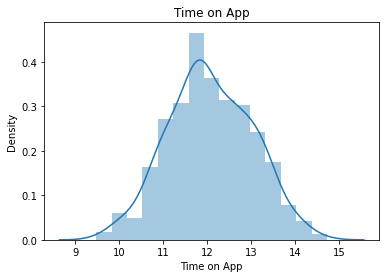

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


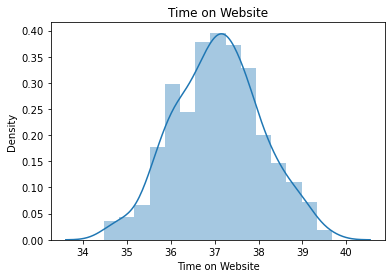

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


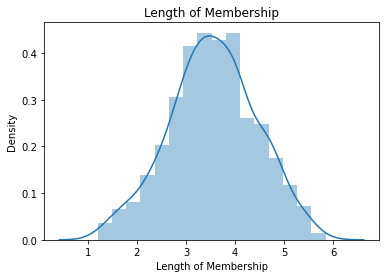

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


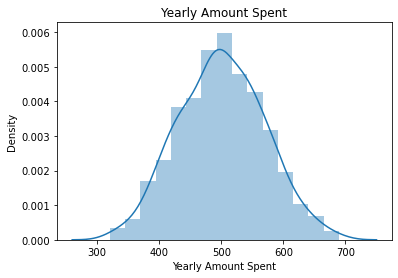

In [20]:
for i in df.columns:
    fig=sns.distplot(df[i]);
    fig.set_title(f"{i}")
    plt.show()

In [21]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

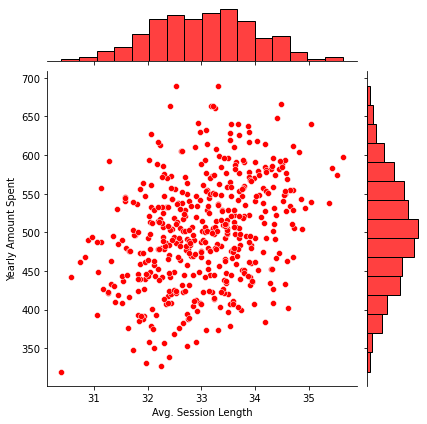

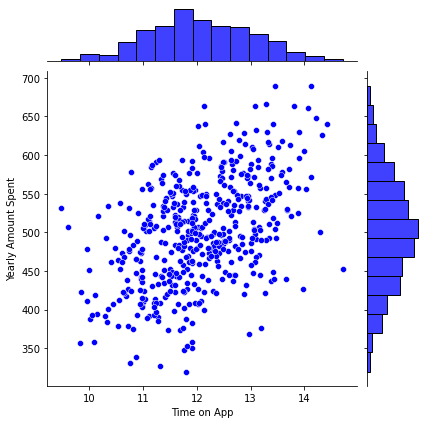

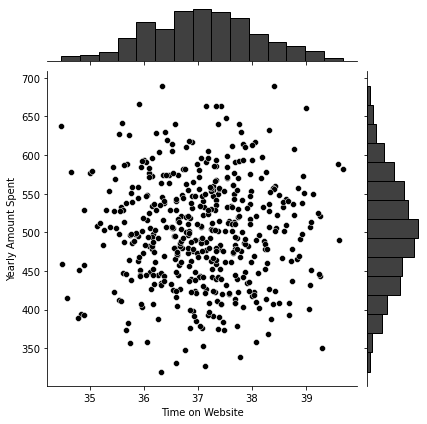

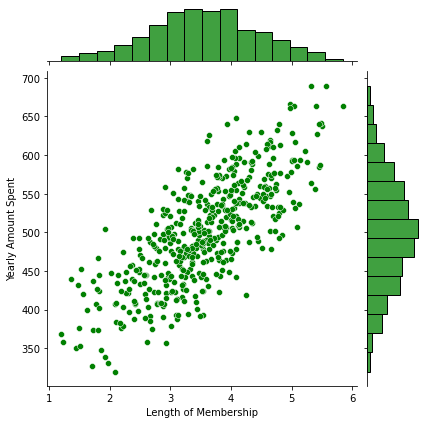

In [22]:
x_column_name = ['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
y_column_name = ['Yearly Amount Spent']
color=["red","blue","black","green"]
for i,j in zip(x_column_name,color):
    sns.jointplot(x=df[i],y=df['Yearly Amount Spent'],color=j)
    plt.show()

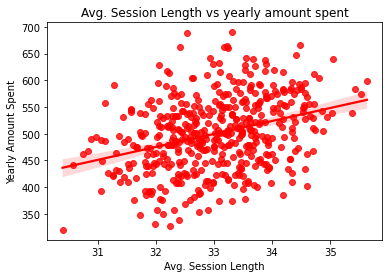

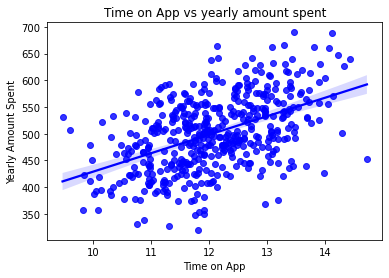

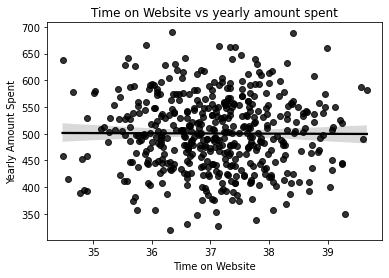

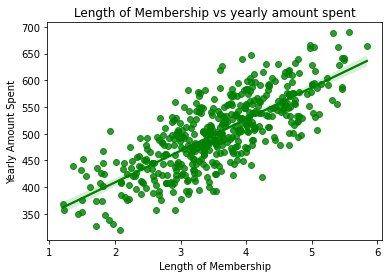

In [23]:
for i,j in zip(x_column_name,color):
    sns.regplot(x=df[i],y=df['Yearly Amount Spent'],color=j).set_title(f"{i} vs yearly amount spent")
    plt.show()

## Linear Regression

In [24]:
def data_scaling(xtrain,xtest):
    sc=StandardScaler()
    sc=sc.fit(xtrain)
    scaled_x_train=sc.transform(xtrain)
    scaled_x_test=sc.transform(xtest)
    return scaled_x_train,scaled_x_test


In [25]:
def model(xtrain,xtest,ytrain,ytest,regressor):
    ytrain=ytrain
    ytest=ytest
    lm=regressor
    lm.fit(xtrain,ytrain)
    ypred=lm.predict(xtest)
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    r_square=r2_score(ytest,ypred)
    print(f"the mae of the {regressor} model is",mae)
    print(f"the mse of the {regressor} model is",mse)
    print(f"the r2 score value of the {regressor} model is",r_square)
    return ypred
    
    

## Simple Linear Regression

In [26]:
x=df["Length of Membership"].values.reshape(-1,1)
y=df["Yearly Amount Spent"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,LinearRegression())


the mae of the LinearRegression() model is 38.62182405019449
the mse of the LinearRegression() model is 2224.9132091022434
the r2 score value of the LinearRegression() model is 0.5355904145678853


## multiple Linear Regression

In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,LinearRegression())

the mae of the LinearRegression() model is 7.960269359905946
the mse of the LinearRegression() model is 107.22004269908055
the r2 score value of the LinearRegression() model is 0.9776197941671686


## Lasso Regression

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,Lasso(alpha=0.01))

the mae of the Lasso(alpha=0.01) model is 7.959898412251714
the mse of the Lasso(alpha=0.01) model is 107.18984450775363
the r2 score value of the Lasso(alpha=0.01) model is 0.9776260974824879


## Ridge Regression

In [29]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,Ridge(alpha=0.01))

the mae of the Ridge(alpha=0.01) model is 7.96034886369406
the mse of the Ridge(alpha=0.01) model is 107.21830728132973
the r2 score value of the Ridge(alpha=0.01) model is 0.9776201564036078


## Elastic Net

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=70)
x_train,x_test=data_scaling(x_train,x_test)
y_pred=model(x_train,x_test,y_train,y_test,ElasticNet(alpha=0.01))

the mae of the ElasticNet(alpha=0.01) model is 7.973172133074591
the mse of the ElasticNet(alpha=0.01) model is 107.06503225135197
the r2 score value of the ElasticNet(alpha=0.01) model is 0.977652149738376
